Link to the downloaded covid data: https://drive.google.com/file/d/13DYafG8GYYcXa8U0Ywu7CvBgtsiND1J_/view?usp=sharing

# **PRE-PROCESSING**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv(r"/content/drive/MyDrive/Data Science/covid.csv")

In [ ]:
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79277 entries, 0 to 79276
Data columns (total 59 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   iso_code                               79277 non-null  object 
 1   continent                              75409 non-null  object 
 2   location                               79277 non-null  object 
 3   date                                   79277 non-null  object 
 4   total_cases                            77699 non-null  float64
 5   new_cases                              77697 non-null  float64
 6   new_cases_smoothed                     76696 non-null  float64
 7   total_deaths                           68270 non-null  float64
 8   new_deaths                             68428 non-null  float64
 9   new_deaths_smoothed                    76696 non-null  float64
 10  total_cases_per_million                77277 non-null  float64
 11  ne

In [ ]:
data.isnull().sum()

iso_code                                     0
continent                                 3868
location                                     0
date                                         0
total_cases                               1578
new_cases                                 1580
new_cases_smoothed                        2581
total_deaths                             11007
new_deaths                               10849
new_deaths_smoothed                       2581
total_cases_per_million                   2000
new_cases_per_million                     2002
new_cases_smoothed_per_million            2998
total_deaths_per_million                 11416
new_deaths_per_million                   11258
new_deaths_smoothed_per_million           2998
reproduction_rate                        15431
icu_patients                             70974
icu_patients_per_million                 70974
hosp_patients                            69333
hosp_patients_per_million                69333
weekly_icu_ad

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
  data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
79272,ZWE,Africa,Zimbabwe,2021-03-30,36839.0,0.0,17.429,1520.0,0.0,0.571,2478.583,0.000,1.173,102.268,0.000,0.038,0.80,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2675.0,435853.0,29.325,0.180,2248.0,0.151,0.008,129.0,tests performed,85866.0,72944.0,12922.0,4256.0,5810.0,0.58,0.49,0.09,391.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79273,ZWE,Africa,Zimbabwe,2021-03-31,36882.0,43.0,19.000,1523.0,3.0,1.000,2481.476,2.893,1.278,102.470,0.202,0.067,0.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1440.0,437293.0,29.422,0.097,1951.0,0.131,0.010,102.7,tests performed,91880.0,76995.0,14885.0,6014.0,5712.0,0.62,0.52,0.10,384.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79274,ZWE,Africa,Zimbabwe,2021-04-01,36896.0,14.0,16.857,1523.0,0.0,0.714,2482.418,0.942,1.134,102.470,0.000,0.048,0.81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2337.0,439630.0,29.579,0.157,2012.0,0.135,0.008,119.4,tests performed,105307.0,87791.0,17516.0,13427.0,6617.0,0.71,0.59,0.12,445.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79275,ZWE,Africa,Zimbabwe,2021-04-02,36903.0,7.0,14.000,1524.0,1.0,0.857,2482.889,0.471,0.942,102.537,0.067,0.058,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,124753.0,103815.0,20938.0,19446.0,8156.0,0.84,0.70,0.14,549.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
79276,ZWE,Africa,Zimbabwe,2021-04-03,36911.0,8.0,13.286,1524.0,0.0,0.714,2483.427,0.538,0.894,102.537,0.000,0.048,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.000,0.000,0.0,0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.0,0.0,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
to_drop = ['iso_code',
           'new_cases_smoothed',
           'new_deaths_smoothed',
           'new_cases_per_million', 
           'new_cases_smoothed_per_million',
           'new_deaths_smoothed_per_million',
           'reproduction_rate',
           'icu_patients',
           'icu_patients_per_million',
           'hosp_patients_per_million', 
           'weekly_icu_admissions',
           'weekly_icu_admissions_per_million',
           'weekly_hosp_admissions',
           'weekly_hosp_admissions_per_million',
           'total_tests_per_thousand',
           'new_tests_per_thousand',
           'new_tests_smoothed',
           'new_tests_smoothed_per_thousand',
           'positive_rate',
           'tests_per_case',
           'tests_units',
           'people_fully_vaccinated', 
           'new_vaccinations_smoothed',
           'total_vaccinations_per_hundred',
           'people_vaccinated_per_hundred',
           'people_fully_vaccinated_per_hundred',
           'new_vaccinations_smoothed_per_million',
           'stringency_index',
           'population_density',
           'median_age',
           'aged_65_older',
           'aged_70_older',
           'gdp_per_capita',
           'extreme_poverty',
           'cardiovasc_death_rate',
           'diabetes_prevalence',
           'female_smokers',
           'male_smokers',
           'handwashing_facilities',
           'hospital_beds_per_thousand',
           'life_expectancy',
           'hosp_patients',
           'human_development_index']
data.drop(to_drop, inplace=True, axis=1)

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_vaccinations,people_vaccinated,new_vaccinations,population
0,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0
1,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0
2,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0
3,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0
4,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79272,Africa,Zimbabwe,2021-03-30,36839.0,0.0,1520.0,0.0,2478.583,102.268,0.000,2675.0,435853.0,85866.0,72944.0,4256.0,14862927.0
79273,Africa,Zimbabwe,2021-03-31,36882.0,43.0,1523.0,3.0,2481.476,102.470,0.202,1440.0,437293.0,91880.0,76995.0,6014.0,14862927.0
79274,Africa,Zimbabwe,2021-04-01,36896.0,14.0,1523.0,0.0,2482.418,102.470,0.000,2337.0,439630.0,105307.0,87791.0,13427.0,14862927.0
79275,Africa,Zimbabwe,2021-04-02,36903.0,7.0,1524.0,1.0,2482.889,102.537,0.067,0.0,0.0,124753.0,103815.0,19446.0,14862927.0


In [ ]:
data['recovered'] = data['total_cases'] - data['total_deaths']
data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_vaccinations,people_vaccinated,new_vaccinations,population,recovered
0,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
1,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
2,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
3,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
4,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79272,Africa,Zimbabwe,2021-03-30,36839.0,0.0,1520.0,0.0,2478.583,102.268,0.000,2675.0,435853.0,85866.0,72944.0,4256.0,14862927.0,35319.0
79273,Africa,Zimbabwe,2021-03-31,36882.0,43.0,1523.0,3.0,2481.476,102.470,0.202,1440.0,437293.0,91880.0,76995.0,6014.0,14862927.0,35359.0
79274,Africa,Zimbabwe,2021-04-01,36896.0,14.0,1523.0,0.0,2482.418,102.470,0.000,2337.0,439630.0,105307.0,87791.0,13427.0,14862927.0,35373.0
79275,Africa,Zimbabwe,2021-04-02,36903.0,7.0,1524.0,1.0,2482.889,102.537,0.067,0.0,0.0,124753.0,103815.0,19446.0,14862927.0,35379.0


In [ ]:
data.columns

Index(['continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million', 'new_tests',
       'total_tests', 'total_vaccinations', 'people_vaccinated',
       'new_vaccinations', 'population', 'recovered'],
      dtype='object')

In [ ]:
#data.to_excel('/content/drive/MyDrive/Data Science/new_data.xlsx')

In [ ]:
dict = data.groupby("location").sum()
dict = dict[['total_cases', 'total_deaths', 'recovered']]
dict

,total_cases,total_deaths,recovered
location,,,
Afghanistan,1.361352e+07,520732.0,1.309278e+07
Africa,6.363634e+08,15887554.0,6.204758e+08
Albania,1.245621e+07,242446.0,1.221376e+07
Algeria,2.082251e+07,651454.0,2.017106e+07
Andorra,1.644177e+06,25130.0,1.619047e+06
...,...,...,...
Vietnam,4.160680e+05,8163.0,4.079050e+05
World,1.775358e+10,445091667.0,1.730849e+10
Yemen,6.188420e+05,170565.0,4.482770e+05


In [ ]:
minimum_cases = dict.sort_values(by = ['total_cases']).reset_index().head(1)
maximum_cases = dict.sort_values(by = ['total_cases'], ascending=False).reset_index().head(2).drop(0).reset_index()
maximum_cases.drop('index', axis=1, inplace=True)

In [ ]:
minimum_deaths = dict.sort_values(by = ['total_deaths']).reset_index().head(1)
maximum_deaths = dict.sort_values(by = ['total_deaths'], ascending=False).reset_index().head(2).drop(0).reset_index()
maximum_deaths.drop('index', axis=1, inplace=True)

In [ ]:
minimum_recovered = dict.sort_values(by = ['recovered']).reset_index().head(1)
maximum_recovered = dict.sort_values(by = ['recovered'], ascending=False).reset_index().head(2).drop(0).reset_index()
maximum_recovered.drop('index', axis=1, inplace=True)

In [ ]:
minimum_cases = minimum_cases.drop(['total_deaths', 'recovered'], axis=1)
maximum_cases = maximum_cases.drop(['total_deaths', 'recovered'], axis=1)

In [ ]:
minimum_deaths = minimum_deaths.drop(['total_cases', 'recovered'], axis=1)
maximum_deaths = maximum_deaths.drop(['total_cases', 'recovered'], axis=1)

In [ ]:
minimum_recovered = minimum_recovered.drop(['total_cases', 'total_deaths'], axis=1)
maximum_recovered = maximum_recovered.drop(['total_cases', 'total_deaths'], axis=1)

In [ ]:
dict = dict.reset_index()

In [ ]:
dict

,location,total_cases,total_deaths,recovered
0,Afghanistan,1.361352e+07,520732.0,1.309278e+07
1,Africa,6.363634e+08,15887554.0,6.204758e+08
2,Albania,1.245621e+07,242446.0,1.221376e+07
3,Algeria,2.082251e+07,651454.0,2.017106e+07
4,Andorra,1.644177e+06,25130.0,1.619047e+06
...,...,...,...,...
210,Vietnam,4.160680e+05,8163.0,4.079050e+05
211,World,1.775358e+10,445091667.0,1.730849e+10
212,Yemen,6.188420e+05,170565.0,4.482770e+05
213,Zambia,8.363075e+06,136047.0,8.227028e+06


------------------------------------

-------------------------

Enter the Country Name and you will get the Total number of Cases

In [ ]:
country = 'India'
dict[dict.location==country].total_cases

89    2.111728e+09
Name: total_cases, dtype: float64

--------------------

Which country is having lowest number of cases?

In [ ]:
minimum_cases

,location,total_cases
0,Isle of Man,0.0


----------------------

Which country is having highest number of cases?


In [ ]:
maximum_cases

,location,total_cases
0,North America,4.913517e+09


------------------------

Which country is having lowest number of deaths?

In [ ]:
minimum_deaths

,location,total_deaths
0,Laos,0.0


--------------------------

Which country is having highest number of deaths?

In [ ]:
maximum_deaths

,location,total_deaths
0,Europe,134516967.0


-------------------

In [ ]:
US_daily_data = data[data.location == "United States"][["total_cases", "total_deaths"]]
India_daily_data = data[data.location == "India"][["total_cases", "total_deaths"]]
Italy_daily_data = data[data.location == "Italy"][["total_cases", "total_deaths"]]
Europe_daily_data = data[data.location == "Europe"][["total_cases", "total_deaths"]]

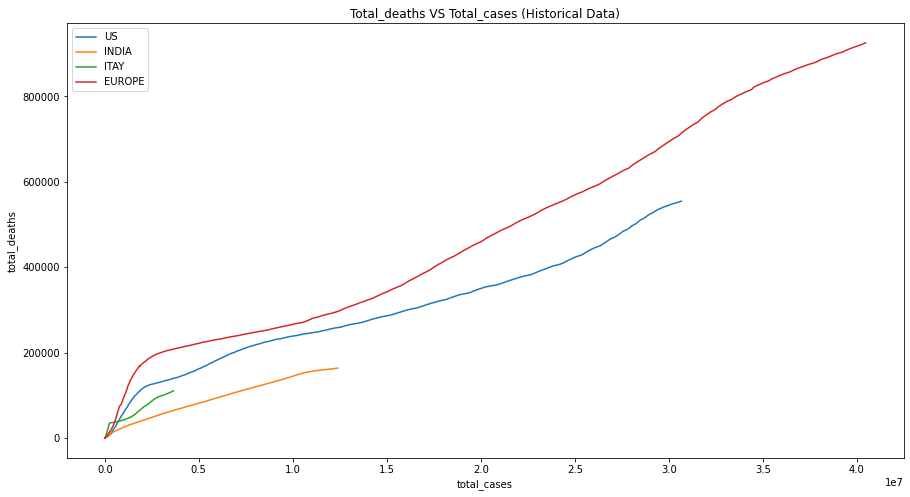

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=US_daily_data, x="total_cases", y="total_deaths").set_title('Total_deaths VS Total_cases (Historical Data)')
sns.lineplot(data=India_daily_data, x="total_cases", y="total_deaths")
sns.lineplot(data=Italy_daily_data, x="total_cases", y="total_deaths")
sns.lineplot(data=Europe_daily_data, x="total_cases", y="total_deaths")
plt.legend(labels=['US', 'INDIA', 'ITAY', 'EUROPE'])

-------------------

In [ ]:
data

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_vaccinations,people_vaccinated,new_vaccinations,population,recovered
0,Asia,Afghanistan,2020-02-24,1.0,1.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
1,Asia,Afghanistan,2020-02-25,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
2,Asia,Afghanistan,2020-02-26,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
3,Asia,Afghanistan,2020-02-27,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
4,Asia,Afghanistan,2020-02-28,1.0,0.0,0.0,0.0,0.026,0.000,0.000,0.0,0.0,0.0,0.0,0.0,38928341.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79272,Africa,Zimbabwe,2021-03-30,36839.0,0.0,1520.0,0.0,2478.583,102.268,0.000,2675.0,435853.0,85866.0,72944.0,4256.0,14862927.0,35319.0
79273,Africa,Zimbabwe,2021-03-31,36882.0,43.0,1523.0,3.0,2481.476,102.470,0.202,1440.0,437293.0,91880.0,76995.0,6014.0,14862927.0,35359.0
79274,Africa,Zimbabwe,2021-04-01,36896.0,14.0,1523.0,0.0,2482.418,102.470,0.000,2337.0,439630.0,105307.0,87791.0,13427.0,14862927.0,35373.0
79275,Africa,Zimbabwe,2021-04-02,36903.0,7.0,1524.0,1.0,2482.889,102.537,0.067,0.0,0.0,124753.0,103815.0,19446.0,14862927.0,35379.0


In [ ]:
US_recovered_data = data[data.location == "United States"][["recovered", "total_deaths"]]
India_recovered_data = data[data.location == "India"][["recovered", "total_deaths"]]
Italy_recovered_data = data[data.location == "Italy"][["recovered","total_deaths"]]
Europe_recovered_data = data[data.location == "Europe"][["recovered","total_deaths"]]

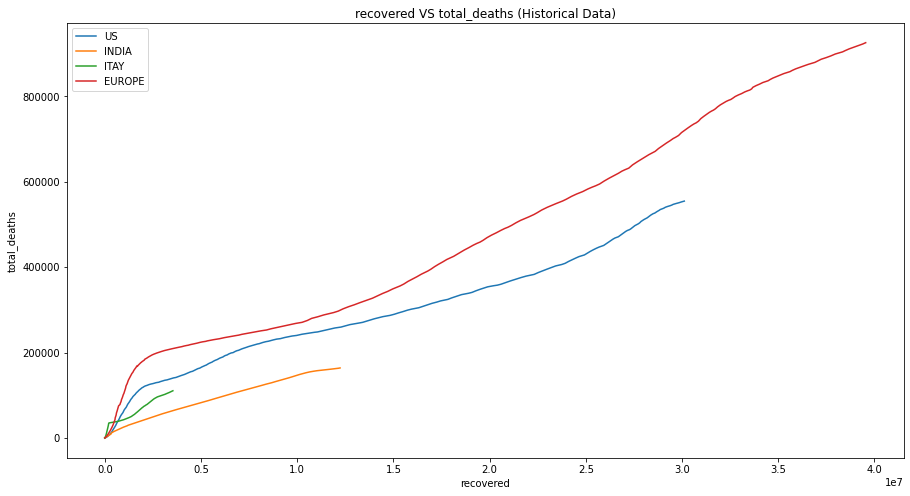

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(data=US_recovered_data, x="recovered", y="total_deaths").set_title('recovered VS total_deaths (Historical Data)')
sns.lineplot(data=India_recovered_data, x="recovered", y="total_deaths")
sns.lineplot(data=Italy_recovered_data, x="recovered", y="total_deaths")
sns.lineplot(data=Europe_recovered_data, x="recovered", y="total_deaths")
plt.legend(labels=['US', 'INDIA', 'ITAY', 'EUROPE'])

There is very minor difference between the above two graphs.

------------

----

Link to the preprocessed data used for forecasting: https://drive.google.com/file/d/17ZMzFfzqljwQNrnyWhFMeimxtabJZ14q/view?usp=drivesdk

# **Forecasting Part**

In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Data Science/new_data.xlsx')
df1.head()

,Unnamed: 0,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_vaccinations,people_vaccinated,new_vaccinations,population,recovered
0,0,Asia,Afghanistan,2020-02-24,1,1,0,0,0.026,0.0,0.0,0,0,0,0,0,38928341,1
1,1,Asia,Afghanistan,2020-02-25,1,0,0,0,0.026,0.0,0.0,0,0,0,0,0,38928341,1
2,2,Asia,Afghanistan,2020-02-26,1,0,0,0,0.026,0.0,0.0,0,0,0,0,0,38928341,1
3,3,Asia,Afghanistan,2020-02-27,1,0,0,0,0.026,0.0,0.0,0,0,0,0,0,38928341,1
4,4,Asia,Afghanistan,2020-02-28,1,0,0,0,0.026,0.0,0.0,0,0,0,0,0,38928341,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79277 entries, 0 to 79276
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                79277 non-null  int64  
 1   continent                 79277 non-null  object 
 2   location                  79277 non-null  object 
 3   date                      79277 non-null  object 
 4   total_cases               79277 non-null  int64  
 5   new_cases                 79277 non-null  int64  
 6   total_deaths              79277 non-null  int64  
 7   new_deaths                79277 non-null  int64  
 8   total_cases_per_million   79277 non-null  float64
 9   total_deaths_per_million  79277 non-null  float64
 10  new_deaths_per_million    79277 non-null  float64
 11  new_tests                 79277 non-null  int64  
 12  total_tests               79277 non-null  int64  
 13  total_vaccinations        79277 non-null  int64  
 14  people

In [ ]:
df1.pop('Unnamed: 0')

0            0
1            1
2            2
3            3
4            4
         ...  
79272    79272
79273    79273
79274    79274
79275    79275
79276    79276
Name: Unnamed: 0, Length: 79277, dtype: int64

In [ ]:
df1

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,total_deaths_per_million,new_deaths_per_million,new_tests,total_tests,total_vaccinations,people_vaccinated,new_vaccinations,population,recovered
0,Asia,Afghanistan,2020-02-24,1,1,0,0,0.026,0.000,0.000,0,0,0,0,0,38928341,1
1,Asia,Afghanistan,2020-02-25,1,0,0,0,0.026,0.000,0.000,0,0,0,0,0,38928341,1
2,Asia,Afghanistan,2020-02-26,1,0,0,0,0.026,0.000,0.000,0,0,0,0,0,38928341,1
3,Asia,Afghanistan,2020-02-27,1,0,0,0,0.026,0.000,0.000,0,0,0,0,0,38928341,1
4,Asia,Afghanistan,2020-02-28,1,0,0,0,0.026,0.000,0.000,0,0,0,0,0,38928341,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79272,Africa,Zimbabwe,2021-03-30,36839,0,1520,0,2478.583,102.268,0.000,2675,435853,85866,72944,4256,14862927,35319
79273,Africa,Zimbabwe,2021-03-31,36882,43,1523,3,2481.476,102.470,0.202,1440,437293,91880,76995,6014,14862927,35359
79274,Africa,Zimbabwe,2021-04-01,36896,14,1523,0,2482.418,102.470,0.000,2337,439630,105307,87791,13427,14862927,35373
79275,Africa,Zimbabwe,2021-04-02,36903,7,1524,1,2482.889,102.537,0.067,0,0,124753,103815,19446,14862927,35379


In [ ]:
df1['date'] = pd.to_datetime(df1['date'])
df1['total_cases'] = df1['total_cases'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79277 entries, 0 to 79276
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   continent                 79277 non-null  object        
 1   location                  79277 non-null  object        
 2   date                      79277 non-null  datetime64[ns]
 3   total_cases               79277 non-null  int64         
 4   new_cases                 79277 non-null  int64         
 5   total_deaths              79277 non-null  int64         
 6   new_deaths                79277 non-null  int64         
 7   total_cases_per_million   79277 non-null  float64       
 8   total_deaths_per_million  79277 non-null  float64       
 9   new_deaths_per_million    79277 non-null  float64       
 10  new_tests                 79277 non-null  int64         
 11  total_tests               79277 non-null  int64         
 12  total_vaccinations

In [ ]:
dfin=df1.loc[df1['location'] == 'India', ['date', 'total_cases']]

In [ ]:
dfus=df1.loc[df1['location'] == 'United States', ['date', 'total_cases']]

In [ ]:
dfeu=df1.loc[df1['location'] == 'Europe', ['date', 'total_cases']]

In [ ]:
dfin

,date,total_cases
32525,2020-01-30,1
32526,2020-01-31,1
32527,2020-02-01,1
32528,2020-02-02,2
32529,2020-02-03,3
...,...,...
32950,2021-03-30,12149335
32951,2021-03-31,12221665
32952,2021-04-01,12303131
32953,2021-04-02,12392260


In [ ]:
dfus

,date,total_cases
75146,2020-01-22,1
75147,2020-01-23,1
75148,2020-01-24,2
75149,2020-01-25,2
75150,2020-01-26,5
...,...,...
75579,2021-03-30,30393805
75580,2021-03-31,30460834
75581,2021-04-01,30539868
75582,2021-04-02,30609690


In [ ]:
dfeu

,date,total_cases
24043,2020-01-23,0
24044,2020-01-24,2
24045,2020-01-25,3
24046,2020-01-26,3
24047,2020-01-27,4
...,...,...
24475,2021-03-30,39592373
24476,2021-03-31,39848358
24477,2021-04-01,40099507
24478,2021-04-02,40316339


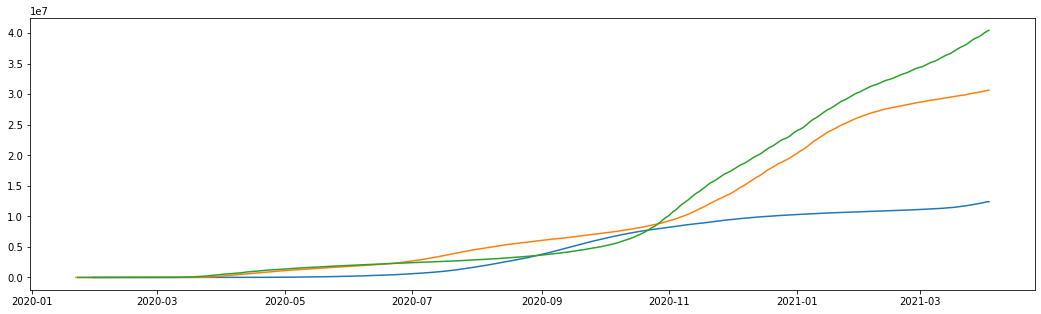

In [ ]:
plt.figure(figsize=(18,5))
plt.plot(dfin['date'],dfin['total_cases'])
plt.plot(dfus['date'],dfus['total_cases'])
plt.plot(dfeu['date'],dfeu['total_cases'])
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
dfin = dfin.rename(columns={'date':'ds','total_cases':'y'})
dfus = dfus.rename(columns={'date':'ds','total_cases':'y'})
dfeu = dfeu.rename(columns={'date':'ds','total_cases':'y'})

In [ ]:
model = Prophet(changepoint_prior_scale=1)
model.fit(dfin)
forecast = model.make_future_dataframe(periods=30,freq='D')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-30,1016.752431,-88167.615265,95919.870101
1,2020-01-31,3566.170250,-86841.297104,98025.538605
2,2020-02-01,5932.444693,-82807.659089,96517.724014
3,2020-02-02,-456.266984,-91165.453964,82670.300610
4,2020-02-03,-3406.687754,-88651.271279,81164.185849


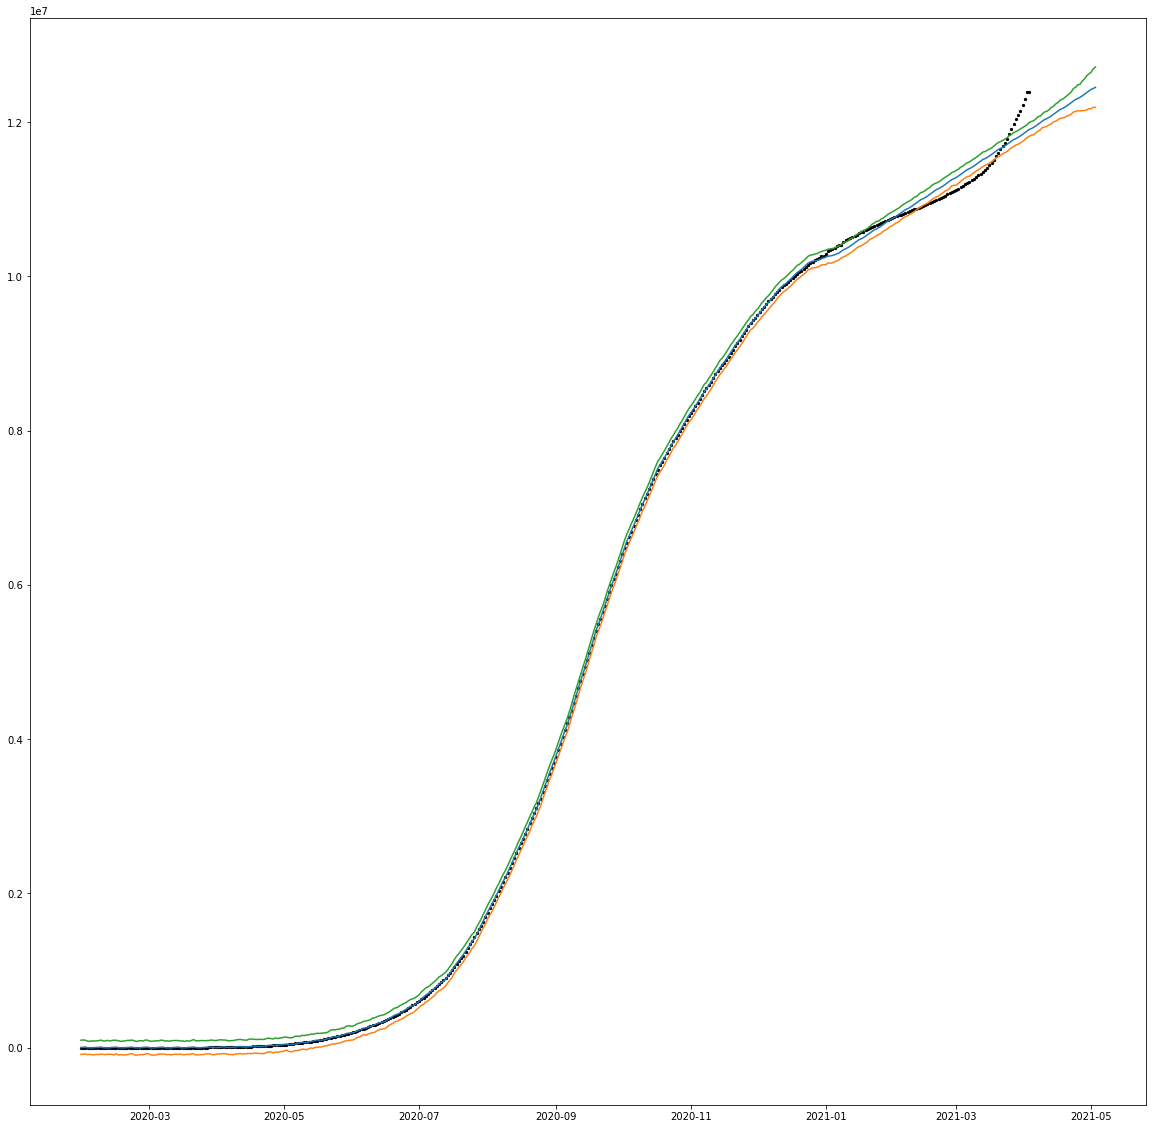

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(dfin['ds'],dfin['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

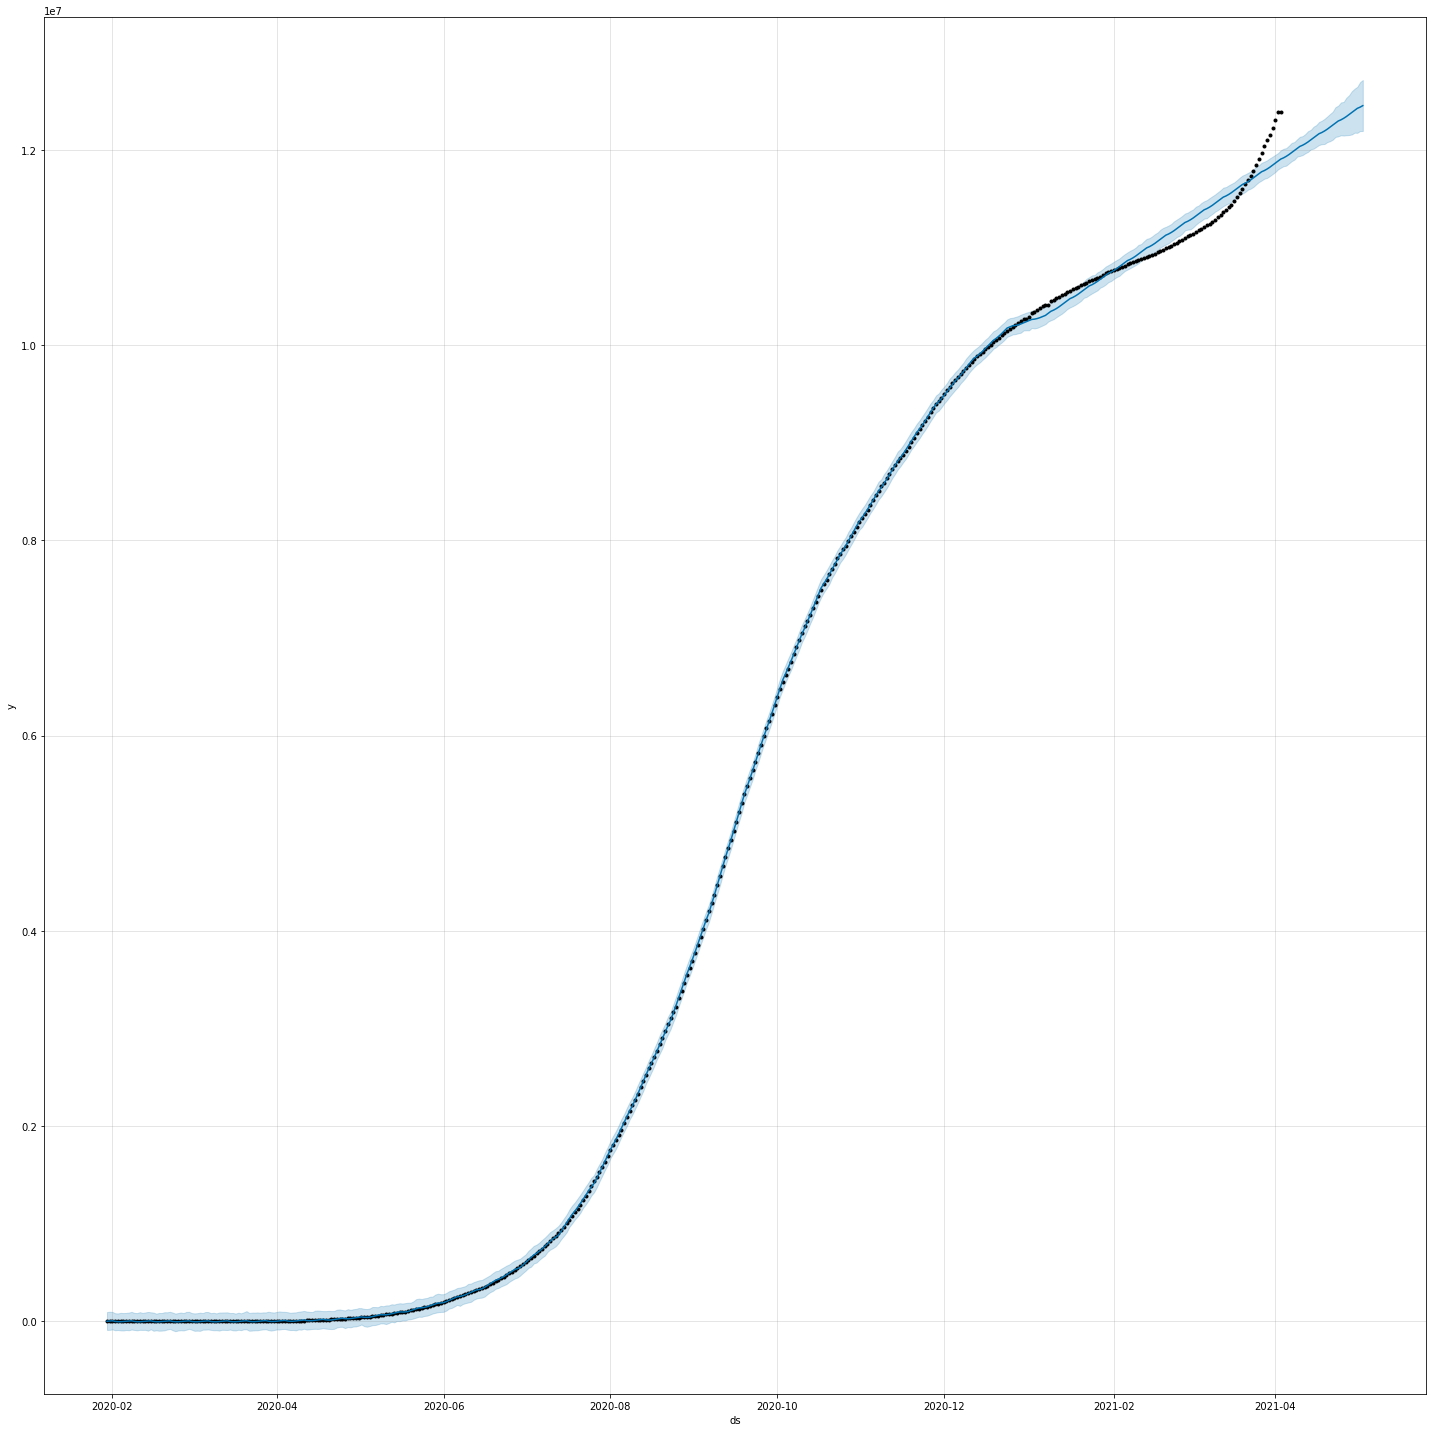

In [ ]:
model.plot(forecast,figsize=(20,20));

In [ ]:
model = Prophet(changepoint_prior_scale=1)
model.fit(dfus)
forecast = model.make_future_dataframe(periods=30,freq='D')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-22,-3218.721808,-460713.090168,462477.874951
1,2020-01-23,-448.631091,-446936.014973,461855.342172
2,2020-01-24,3733.742873,-404658.898756,443969.720295
3,2020-01-25,3180.258657,-459346.197690,416382.365147
4,2020-01-26,6581.447494,-434810.484577,458148.105886


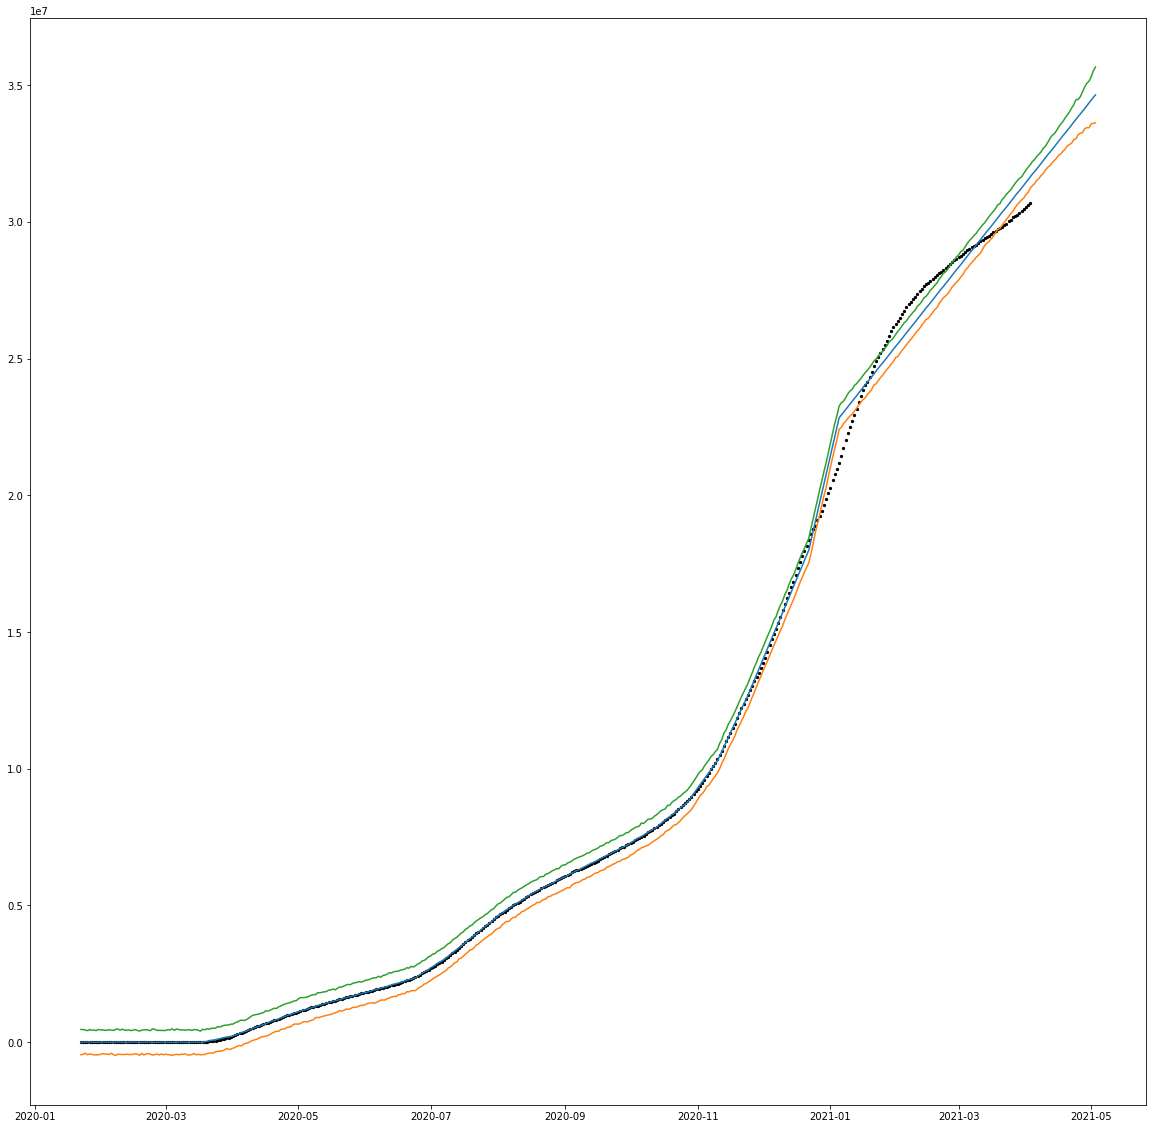

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(dfus['ds'],dfus['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

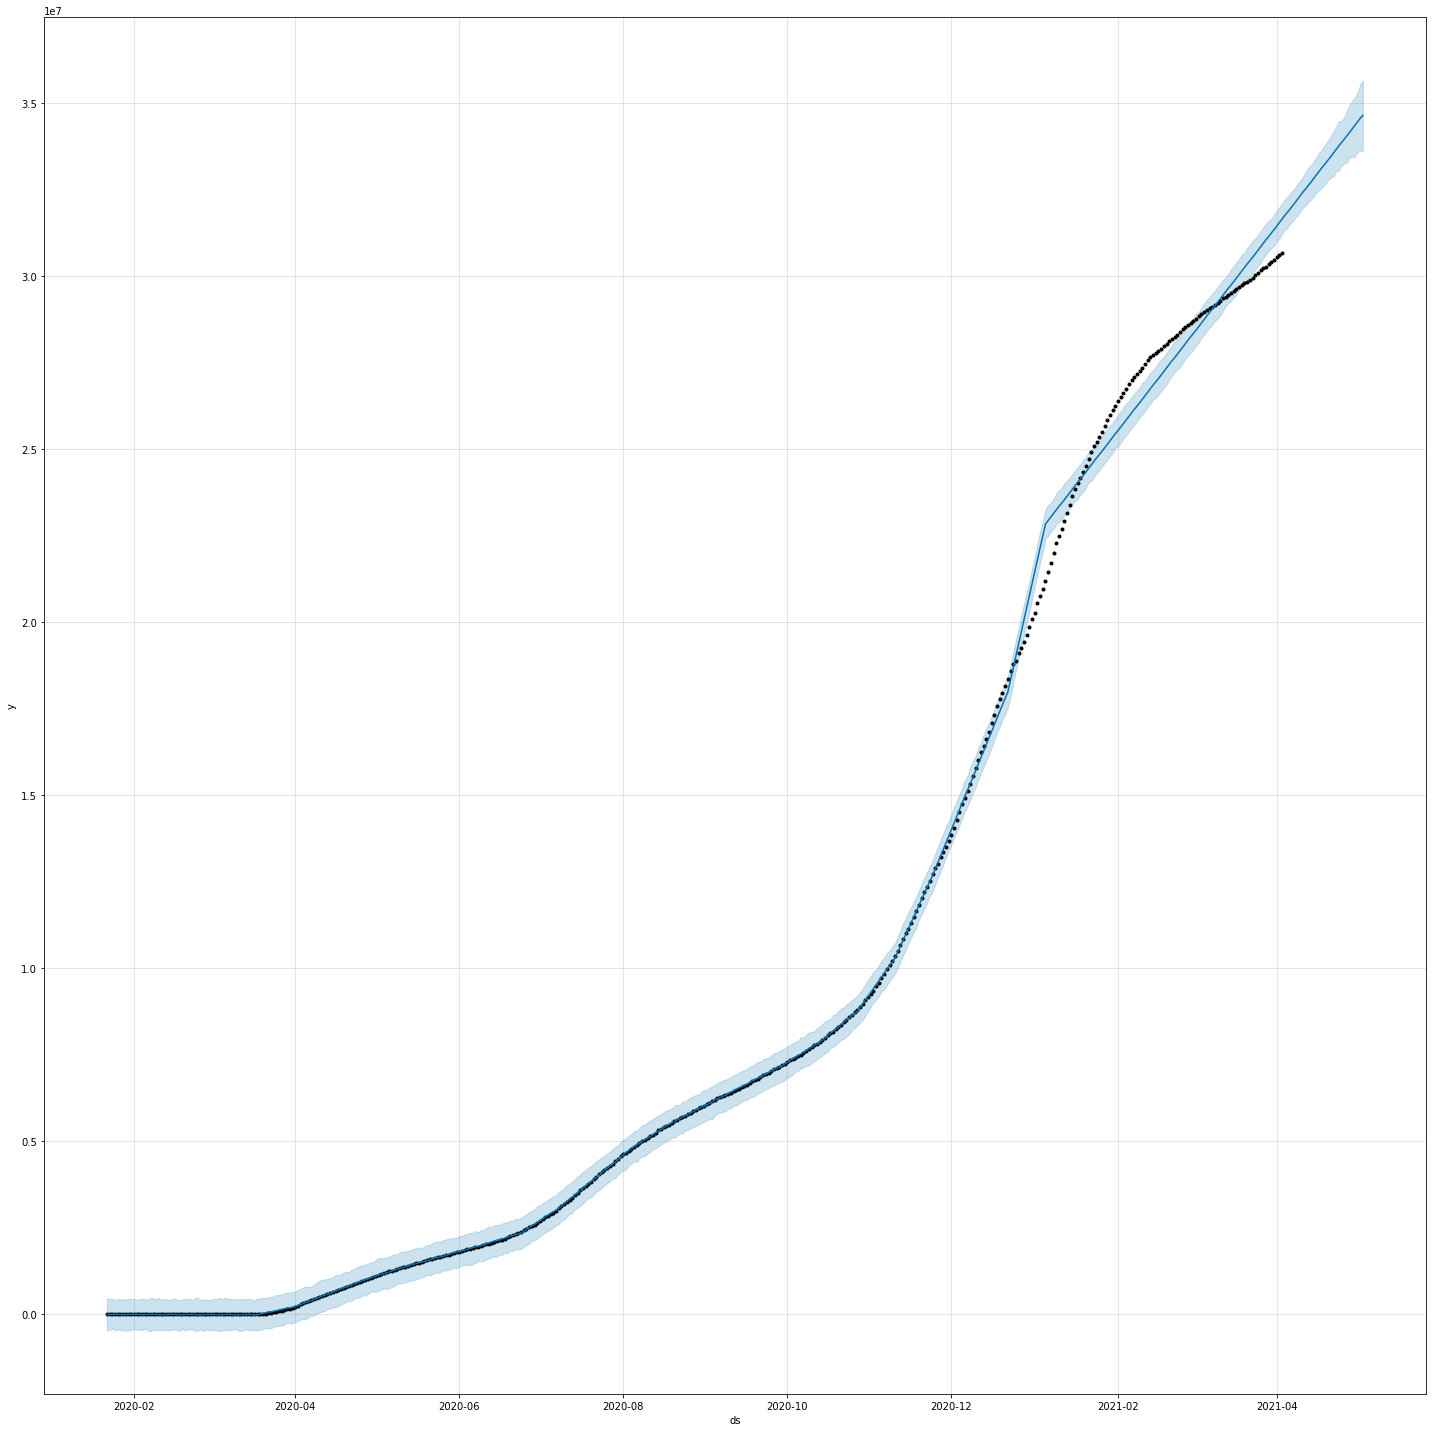

In [ ]:
model.plot(forecast,figsize=(20,20));

In [ ]:
model = Prophet(changepoint_prior_scale=1)
model.fit(dfeu)
forecast = model.make_future_dataframe(periods=30,freq='D')
forecast = model.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-23,10823.338076,-201468.743739,217397.505301
1,2020-01-24,21555.282366,-195419.860627,220030.471562
2,2020-01-25,14914.761952,-193168.657698,227805.978479
3,2020-01-26,-10125.708121,-230230.418159,193187.588651
4,2020-01-27,-17170.468643,-250176.845817,182980.737489


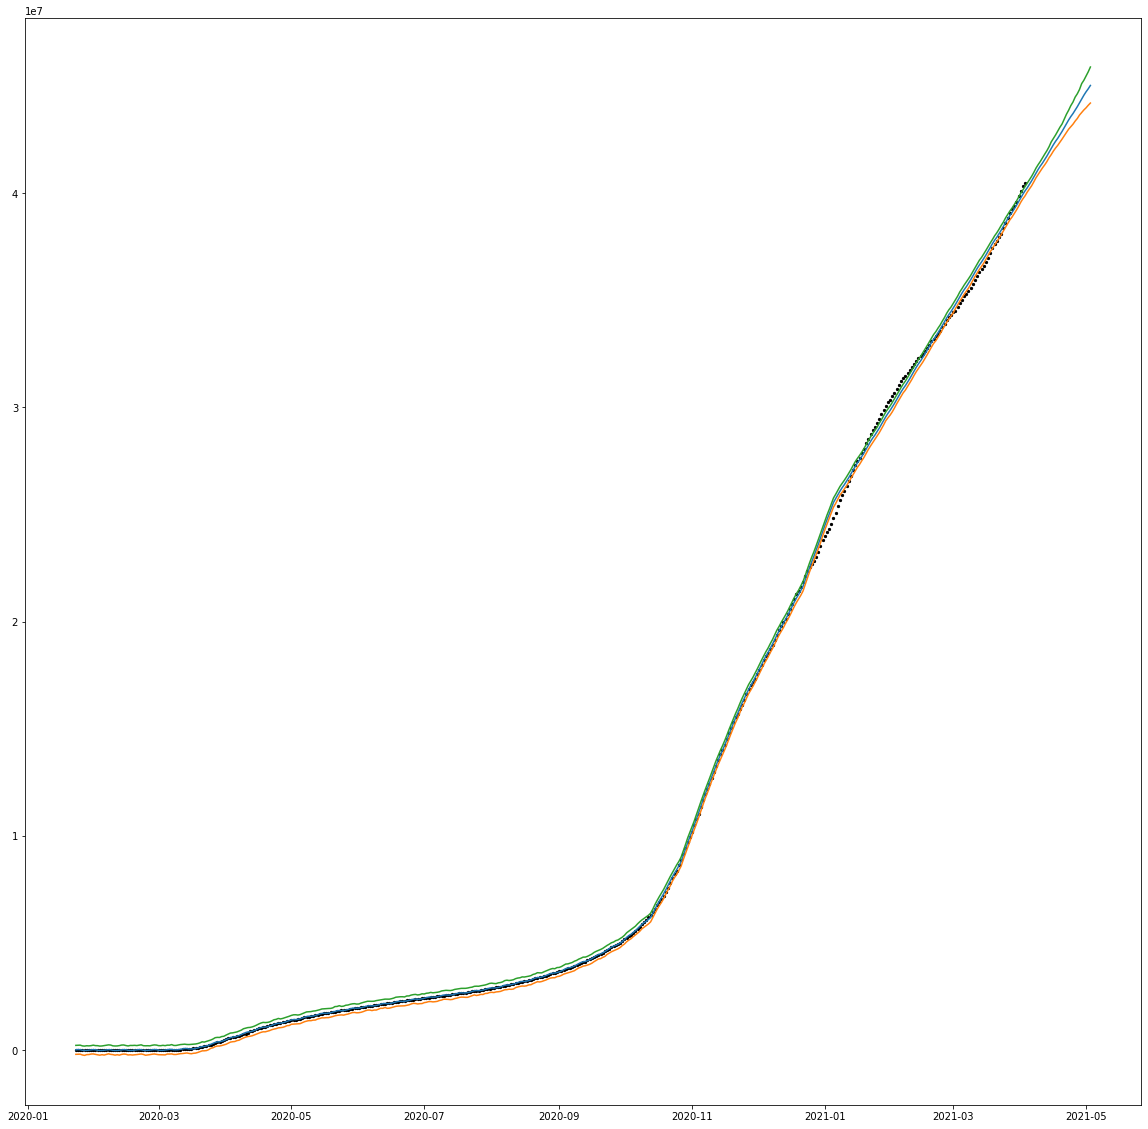

In [ ]:
plt.figure(figsize=(20,20))
plt.scatter(dfeu['ds'],dfeu['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

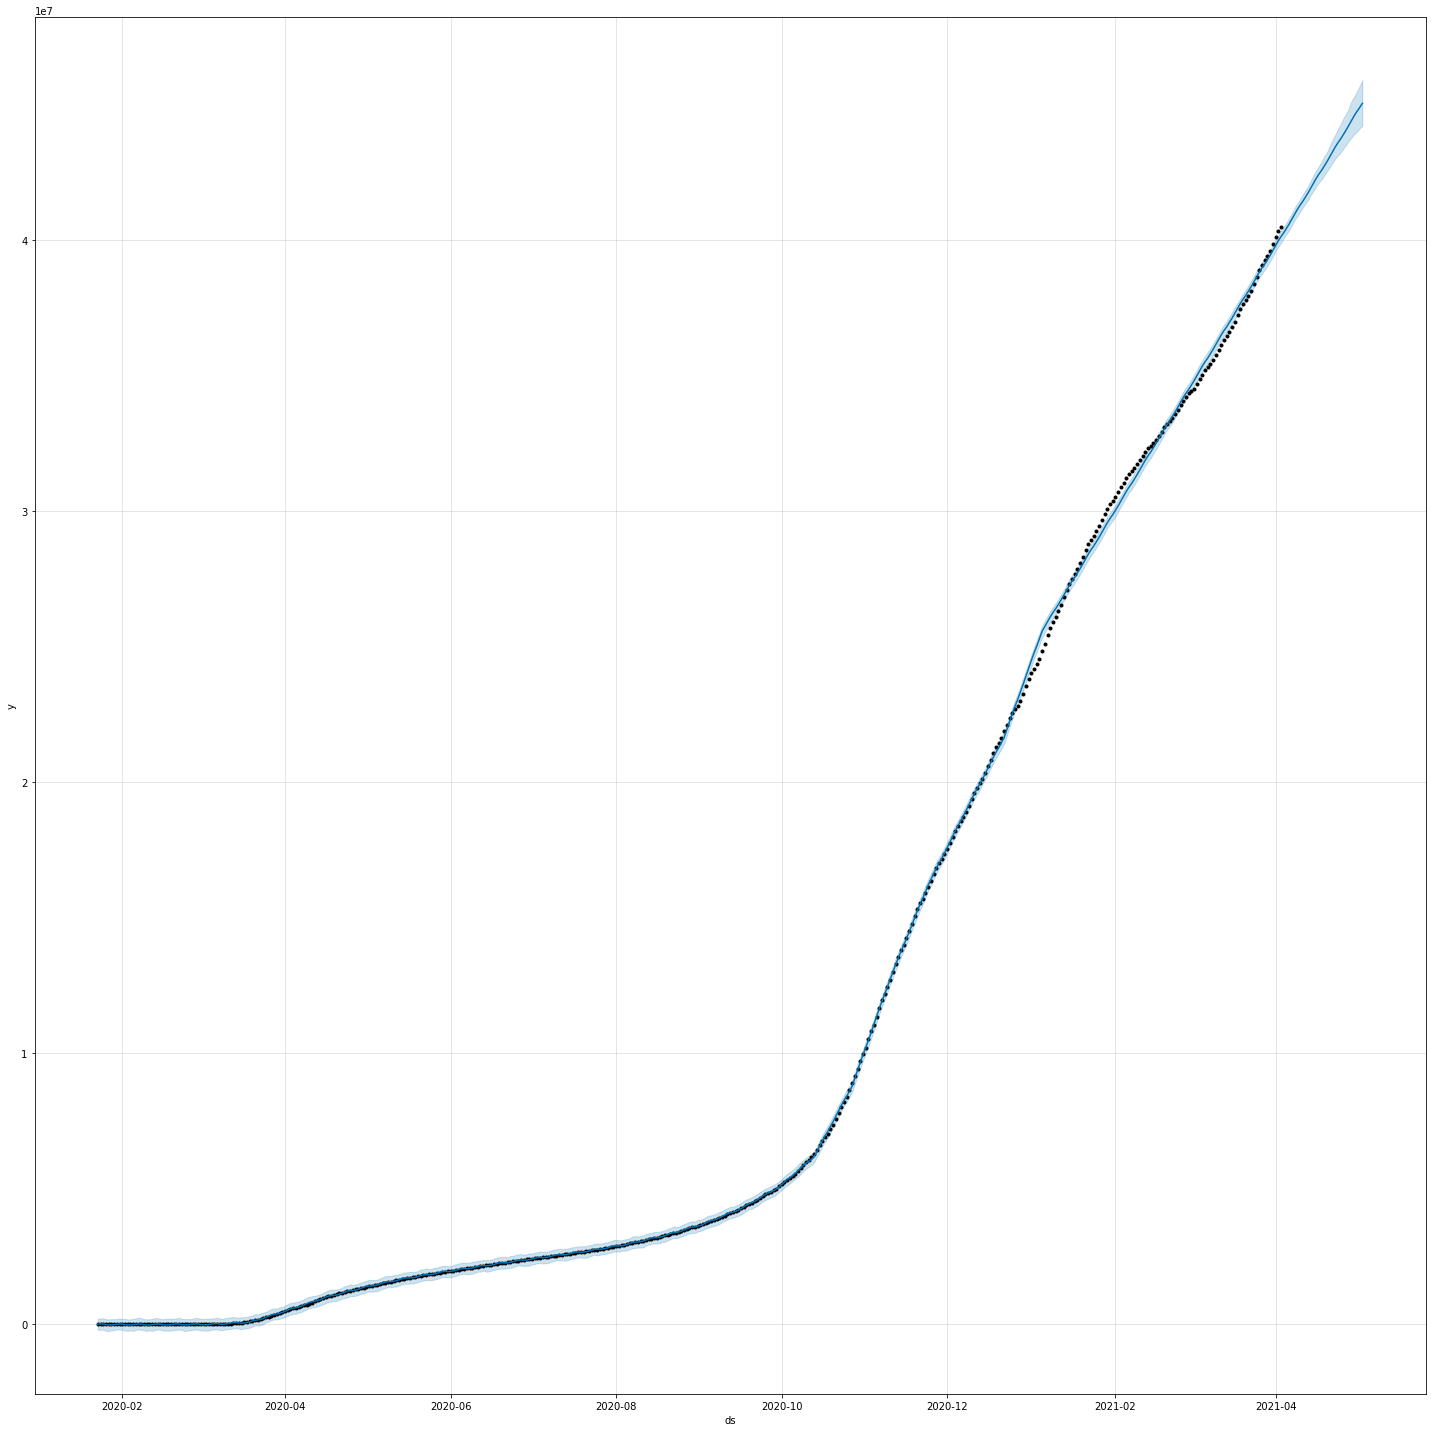

In [ ]:
model.plot(forecast,figsize=(20,20));